pandas version: 2.2.2
scikit-learn version: 1.6.1


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

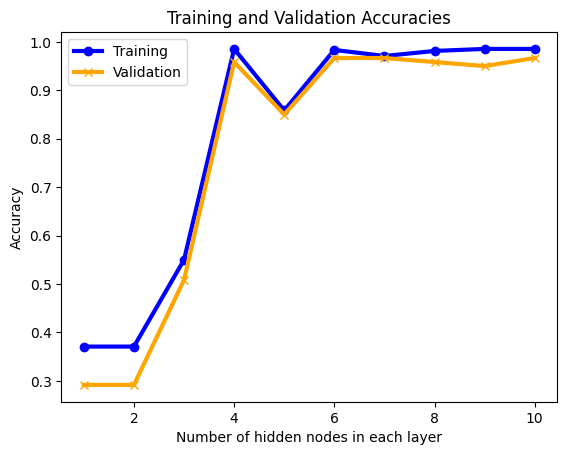

best hidden node size = 6 based on 5-fold cross-validation on training set
test accuracy = 1.0


In [1]:
import numpy as np
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # neural network
from sklearn import metrics

def find_network_size(X_train, y_train):
 acc_train_array = []
 acc_valid_array = []
 for Nhidd in range(1,11):
  acc_train_array_fold = []
  acc_valid_array_fold = []
  ## Random permutation of data
  Idx = np.random.RandomState(seed=8).permutation(len(y_train))
  ## Tuning: perform 5-fold cross-validation on the training set to determine the best network size
  for k in range(0,5):
    N = np.around((k+1)*len(y_train)/5)  #calculates the index N that is used to split
    #the training data into training and validation sets for 5-fold cross-validation
    N = N.astype(int) #convert N into an integer
    Xvalid = X_train[Idx[N-24:N]] # validation features #training set has 120 samples.
                                  # In 5-fold cross-validation, each fold has 24 samples (120/5=24).
    Yvalid = y_train[Idx[N-24:N]] # validation targets
    Idxtrn = np.setdiff1d(Idx, Idx[N-24:N])
    Xtrain = X_train[Idxtrn] # training features in tuning loop
    Ytrain = y_train[Idxtrn] # training targets in tuning loop
    ## MLP Classification with same size for each hidden-layer (specified in question)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(Nhidd,Nhidd,Nhidd), random_state=1)
    clf.fit(Xtrain, Ytrain)
    ## trained output
    y_est_p = clf.predict(Xtrain)
    acc_train_array_fold += [metrics.accuracy_score(y_est_p,Ytrain)]
    ## validation output
    yt_est_p = clf.predict(Xvalid)
    acc_valid_array_fold += [metrics.accuracy_score(yt_est_p,Yvalid)]
  acc_train_array += [np.mean(acc_train_array_fold)]
  acc_valid_array += [np.mean(acc_valid_array_fold)]
 ## find the size that gives the best validation accuracy
 Nhidden = np.argmax(acc_valid_array,axis=0)+1
 ## plotting
 import matplotlib.pyplot as plt
 hiddensize = [x for x in range(1,11)]
 plt.plot(hiddensize, acc_train_array, color='blue', marker='o', linewidth=3, label='Training')
 plt.plot(hiddensize, acc_valid_array, color='orange', marker='x', linewidth=3, label='Validation')
 plt.xlabel('Number of hidden nodes in each layer')
 plt.ylabel('Accuracy')
 plt.title('Training and Validation Accuracies')
 plt.legend()
 plt.show()
 return Nhidden


## load data
iris_dataset = load_iris()
## split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.20, random_state=0)
## find the best hidden node size using only the training set
Nhidden = find_network_size(X_train, y_train)
print('best hidden node size =', Nhidden, 'based on 5-fold cross-validation on training set')
## perform evaluation
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(Nhidden,Nhidden,Nhidden),
random_state=1)
clf.fit(X_train, y_train)
## trained output
y_test_predict = clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test_predict,y_test)
print('test accuracy =', test_accuracy)